In [33]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

In [34]:
#Load in the MNIST dataset
mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [35]:
#Scale the images
x_train,x_test = x_train/255.0,x_test/255.0
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [36]:
#Convolution expects color image but input images are gray scale
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [37]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [59]:
""" 
#Build our model using keras API
shape = x_train[0].shape
model = tf.keras.Sequential()
model.add(Conv2D(32,(3,3),strides=2,padding='same',activation='relu',input_shape=shape))
model.add(Conv2D(64,(3,3),strides=2,padding='same',activation='relu',input_shape=shape))
model.add(Conv2D(128,(3,3),strides=2,padding='same',activation='relu',input_shape=shape))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu',input_shape=shape))
model.add(Dropout(0.2))
model.add(Dense(K,activation='softmax'))
"""

In [70]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [71]:
#Compile and fit the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Train the model
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,batch_size=16)

Epoch 1/15
3750/3750 [==============================] - 9s 3ms/step - loss: 0.4990 - accuracy: 0.8142 - val_loss: 0.4141 - val_accuracy: 0.8456
Epoch 2/15
3750/3750 [==============================] - 9s 2ms/step - loss: 0.3504 - accuracy: 0.8675 - val_loss: 0.3290 - val_accuracy: 0.8772
Epoch 3/15
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3032 - accuracy: 0.8870 - val_loss: 0.3169 - val_accuracy: 0.8844
Epoch 4/15
3750/3750 [==============================] - 10s 3ms/step - loss: 0.2761 - accuracy: 0.8954 - val_loss: 0.3114 - val_accuracy: 0.8852
Epoch 5/15
3750/3750 [==============================] - 9s 3ms/step - loss: 0.2524 - accuracy: 0.9049 - val_loss: 0.3187 - val_accuracy: 0.8901
Epoch 6/15
3750/3750 [==============================] - 10s 3ms/step - loss: 0.2330 - accuracy: 0.9122 - val_loss: 0.3075 - val_accuracy: 0.8946
Epoch 7/15
3750/3750 [==============================] - 9s 3ms/step - loss: 0.2174 - accuracy: 0.9182 - val_loss: 0.3126 - val_accura

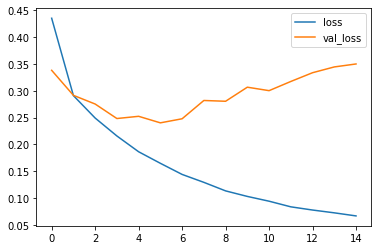

In [54]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

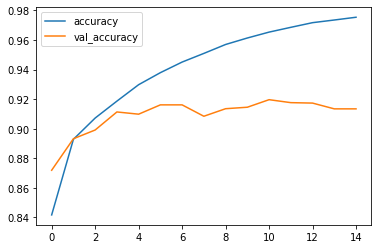

In [55]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[844   0  22  11   5   2 110   0   6   0]
 [  4 974   1  11   2   0   6   0   2   0]
 [ 14   0 847   4  64   0  68   0   3   0]
 [ 18   4  18 873  44   1  40   0   2   0]
 [  1   1  60  13 865   0  58   0   2   0]
 [  0   1   1   1   0 968   0  20   0   9]
 [108   0  73  22 103   0 684   0  10   0]
 [  0   0   0   0   0   9   0 960   0  31]
 [  0   0   5   3   4   2   3   1 980   2]
 [  0   0   0   0   0   4   1  30   1 964]]


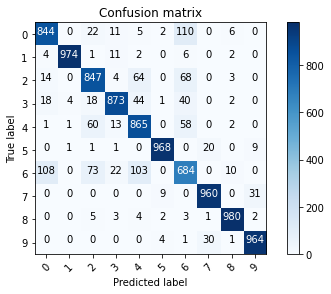

In [64]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [65]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

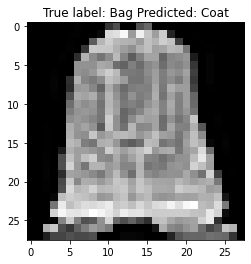

In [69]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));